# Loan 데이터 분류나무 예측성능 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [4]:
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

## Train/Test 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

## 나무 모형

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Pruning

In [7]:
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.005, 0.0001)}, cv=10)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049])})

In [8]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0008}
score   : 0.8960404591430844


### Alpha=0.0008 트리

In [9]:
c1_tree = DecisionTreeClassifier(ccp_alpha=0.0008,random_state=0) 
c1_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008, random_state=0)

### 하이퍼파라미터 튜닝

In [10]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.002, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]),
                         'min_impurity_decrease': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [11]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}
score   : 0.8960410273894761


### Alpha=0.0, min_impurity_decrease=0.0005,  min_samples_split=2  트리

In [12]:
c2_tree = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
c2_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

### Min_impurity_decrease 튜닝

In [13]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'min_impurity_decrease': np.arange(0,0.002,0.0001)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_impurity_decrease': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019])})

In [14]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'min_impurity_decrease': 0.00030000000000000003}
score   : 0.897471871803614


In [15]:
c3_tree = DecisionTreeClassifier(min_impurity_decrease=0.0003,random_state=0) 
c3_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0003, random_state=0)

### Default 트리

In [16]:
c4_tree = DecisionTreeClassifier(random_state=0) 
c4_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### ROC 곡선 및 AUC

In [17]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/9.2 MB 9.4 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.2 MB 27.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.0/9.2 MB 28.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.7/9.2 MB 32.9 MB/s eta 0:00:01
   --------------------------------- ------ 7.8/9.2 MB 35.6 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.2 MB 36.8 MB/s eta 0:00:01
   ---------------------------------------- 9.2/9.2 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# from sklearn.metrics import plot_roc_curve plot_
roc_tree=roc_curve(c1_tree, X_test, y_test)
roc_curve(c2_tree, X_test, y_test, ax = roc_tree.ax_)
roc_curve(c3_tree, X_test, y_test, ax = roc_tree.ax_)
roc_curve(c4_tree, X_test, y_test, ax = roc_tree.ax_)
plt.title("ROC curve comparison")
plt.show()

TypeError: too many positional arguments

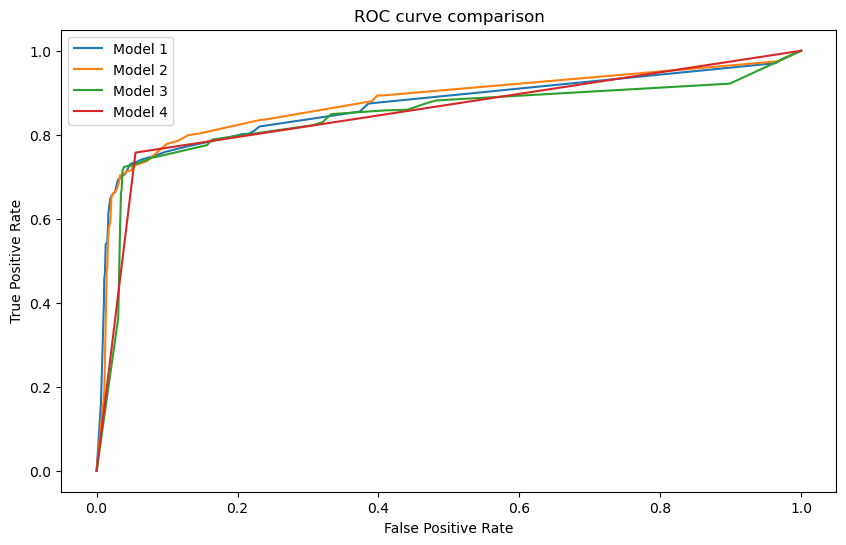

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each model
fpr1, tpr1, _ = roc_curve(y_test, c1_tree.predict_proba(X_test)[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, c2_tree.predict_proba(X_test)[:, 1])
fpr3, tpr3, _ = roc_curve(y_test, c3_tree.predict_proba(X_test)[:, 1])
fpr4, tpr4, _ = roc_curve(y_test, c4_tree.predict_proba(X_test)[:, 1])

# Plot ROC curves for each model
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label='Model 1')
plt.plot(fpr2, tpr2, label='Model 2')
plt.plot(fpr3, tpr3, label='Model 3')
plt.plot(fpr4, tpr4, label='Model 4')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve comparison')
plt.legend()
plt.show()

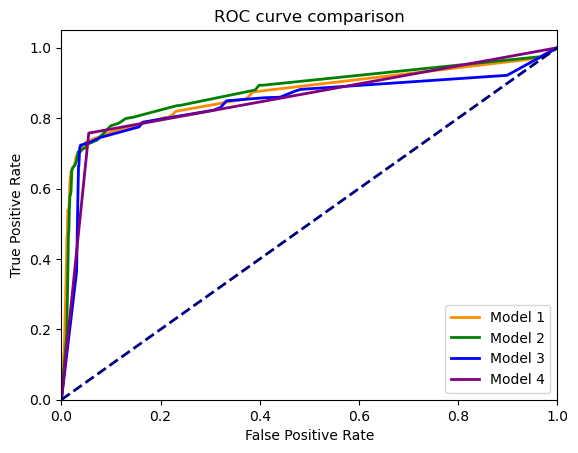

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 각 모델의 예측 확률 값을 얻습니다.
y_score1 = c1_tree.predict_proba(X_test)[:, 1]
y_score2 = c2_tree.predict_proba(X_test)[:, 1]
y_score3 = c3_tree.predict_proba(X_test)[:, 1]
y_score4 = c4_tree.predict_proba(X_test)[:, 1]

# ROC curve를 구합니다.
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
fpr2, tpr2, _ = roc_curve(y_test, y_score2)
fpr3, tpr3, _ = roc_curve(y_test, y_score3)
fpr4, tpr4, _ = roc_curve(y_test, y_score4)

# ROC curve를 그립니다.
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Model 1')
plt.plot(fpr2, tpr2, color='green', lw=2, label='Model 2')
plt.plot(fpr3, tpr3, color='blue', lw=2, label='Model 3')
plt.plot(fpr4, tpr4, color='purple', lw=2, label='Model 4')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve comparison')
plt.legend(loc="lower right")
plt.show()







In [23]:
y_score1.shape,print(y_score1)

[0.97377049 0.08695652 0.04697286 ... 0.97377049 0.1        1.        ]


((2797,), None)

## 다른 분류방법과의 비교

### 로지스틱 회귀분석

In [24]:
from sklearn.linear_model import LogisticRegression
c_logit = LogisticRegression(random_state=0, max_iter = 1000)
c_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### 신경망분석

In [25]:
!pip install -U scikit-learn
!pip install -U scikit-learn --upgrade-deps


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgrade-deps


In [26]:
# !pip uninstall scikit-learn
# !pip install scikit-learn

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVM

In [28]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

### 랜덤포레스트

In [29]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### ROC 곡선 및 AUC

In [32]:
roc_tree=roc_curve(c2_tree, X_test, y_test)
plot_roc_curveroc_curve(c_logit, X_test, y_test, ax = roc_tree.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = roc_tree.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = roc_tree.ax_)
plot_roc_curve(c_rf, X_test, y_test, ax = roc_tree.ax_)
plt.title("ROC curve comparison")
plt.show()

TypeError: too many positional arguments

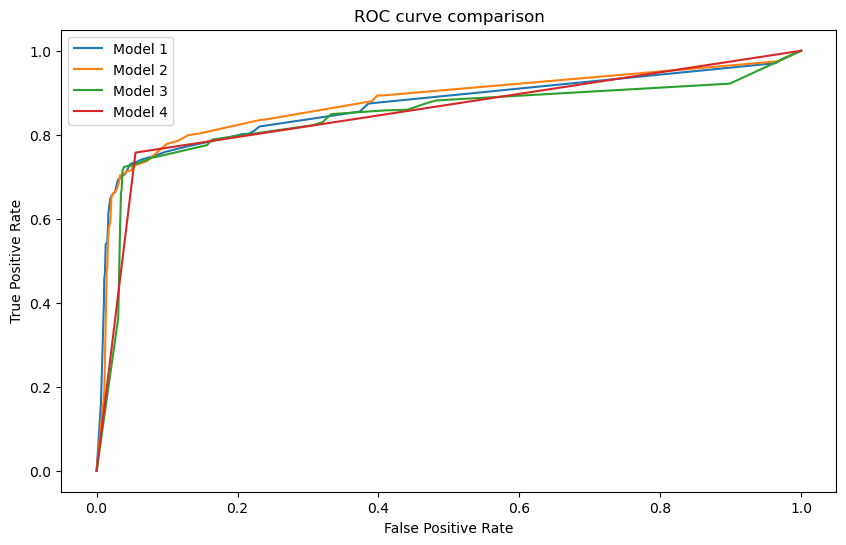

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

models = [c1_tree, c2_tree, c3_tree, c4_tree]  # Your models
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']  # Names for the legend

plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve comparison')
plt.legend()
plt.show()